In [26]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes

In [27]:
# Load the dataset
df = pd.read_csv('../data/benin-malanville.csv')

In [24]:
# check the shape of the dataset
display(df.shape)

(525600, 18)

In [28]:
# Summary Statistics & Missing-Value Report
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [29]:
# Missing Value Report
# write a function to print the missing value report
def missing_report(df):
    """
    This function takes a DataFrame and returns a DataFrame with missing values.
    
    :param df: pandas DataFrame, the input DataFrame
    :return: pandas DataFrame, the DataFrame with missing values
    """
    na_counts = df.isna().sum()
    total = len(df)
    null_report = pd.DataFrame({
        'Missing Count': na_counts,
        'Missing %': (na_counts / total * 100).round(2)
    })
    high_nulls = null_report[null_report['Missing %'] > 5]
    if not high_nulls.empty:
        print("Columns with >5% missing values:")
        display(high_nulls)

missing_report(df)


Columns with >5% missing values:


,Missing Count,Missing %
Comments,525600,100.0


In [30]:
# Remove comments column
df.drop('Comments', axis=1, inplace=True)

In [ ]:
# Outlier detection and Basic cleaning
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_zscores = df[columns_to_check].apply(zscore)

# Flag outliers with |Z| > 3
outliers = (df_zscores.abs() > 3)
print("Number of outliers per column:\n", outliers.sum())

# Flag outliers in the original DataFrame
for col in columns_to_check:
    df[f'{col}_zscore'] = df_zscores[col]
    df[f'{col}_outlier'] = outliers[col]

# Optionally: mark rows with any outlier
df['outlier_flag'] = outliers.any(axis=1)

# Remove outliers
cleaned_df = df[~df['outlier_flag']]
print(f"Removed {len(df) - len(cleaned_df)} outliers.")

# Export cleaned data
cleaned_df.to_csv('../data/benin_clean.csv', index=False)

# print uotliers columns
outlier_columns = [col for col in df.columns if '_outlier' in col]
outlier_df = df[outlier_columns]
display(outlier_df)

Number of outliers per column:
 GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64
Removed 7740 outliers.


,GHI_outlier,DNI_outlier,DHI_outlier,ModA_outlier,ModB_outlier,WS_outlier,WSgust_outlier
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
525595,False,False,False,False,False,False,False
525596,False,False,False,False,False,False,False
525597,False,False,False,False,False,False,False
525598,False,False,False,False,False,False,False


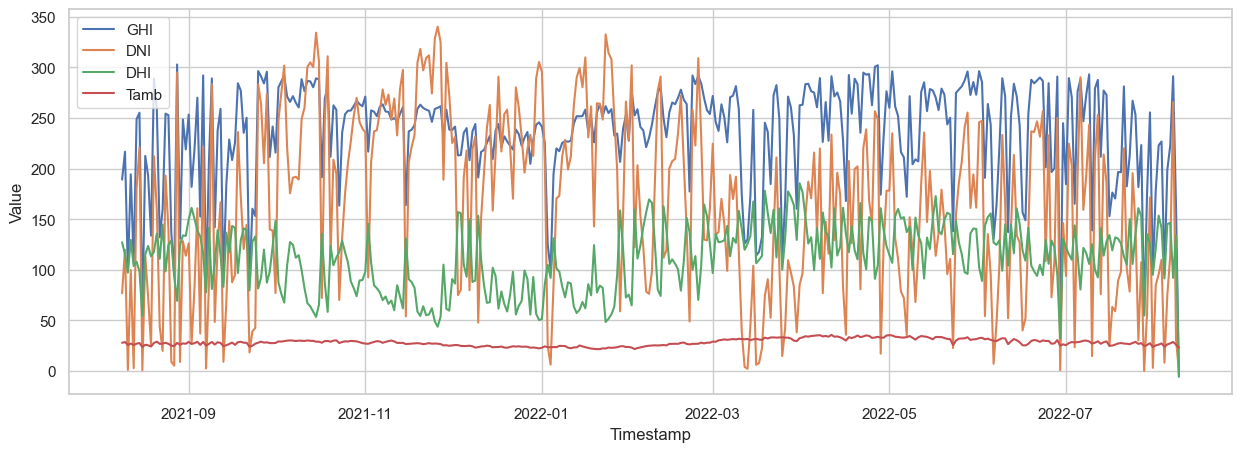

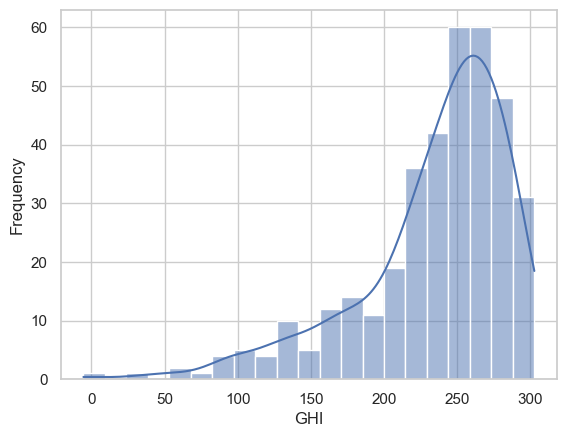

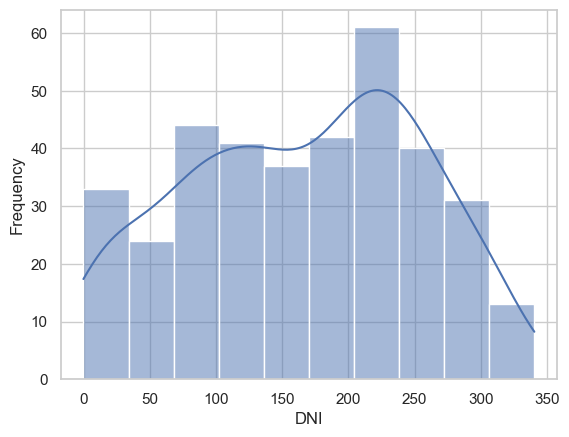

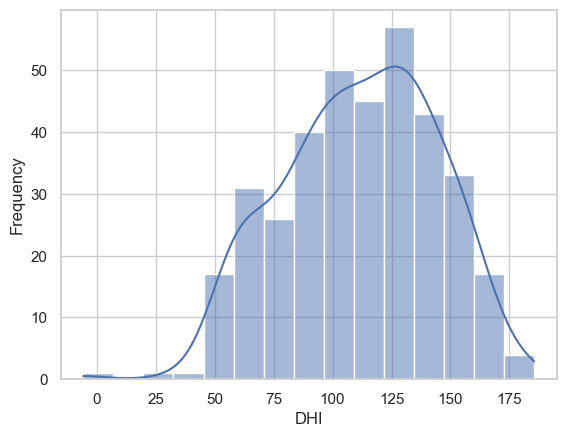

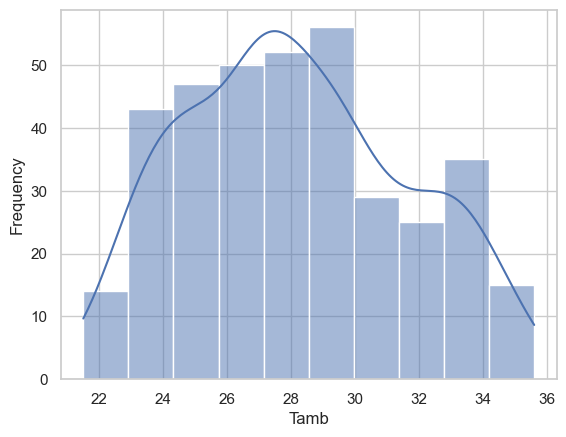

In [ ]:
# Time Series Analysis
# Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp.
# Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 
def plot_time_series(df):
    """
    Plot time series data for specified columns.

    Parameters:
    - df: DataFrame containing the time series data
    - columns: List of columns to plot
    - title: Title of the plot
    """
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)
    # Resample the data to daily frequency
    df_daily = df.resample('D').mean()
    df_daily['Timestamp'] = df_daily.index
    df_daily.set_index('Timestamp', inplace=True)
    df_daily.head()
    # Plotting the time series data
    plt.figure(figsize=(15, 5))
    plt.plot(df_daily.index, df_daily['GHI'], label='GHI')
    plt.plot(df_daily.index, df_daily['DNI'], label='DNI')
    plt.plot(df_daily.index, df_daily['DHI'], label='DHI')
    plt.plot(df_daily.index, df_daily['Tamb'], label='Tamb')

    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    # Plotting the distribution of GHI
    # plt.figure(figsize=(7, 3))
    sns.histplot(df_daily['GHI'], kde=True)
    plt.xlabel('GHI')
    plt.ylabel('Frequency')
    plt.show()
    # Plotting the distribution of DNI
    # plt.figure(figsize=(7, 3))
    sns.histplot(df_daily['DNI'], kde=True)
    plt.xlabel('DNI')
    plt.ylabel('Frequency')
    plt.show()
    # Plotting the distribution of DHI
    # plt.figure(figsize=(7, 3))
    sns.histplot(df_daily['DHI'], kde=True)
    plt.xlabel('DHI')
    plt.ylabel('Frequency')
    plt.show()
    # Plotting the distribution of Tamb
    # plt.figure(figsize=(7, 3))
    sns.histplot(df_daily['Tamb'], kde=True)
    plt.xlabel('Tamb')
    plt.ylabel('Frequency')
    plt.show()

plot_time_series(cleaned_df)

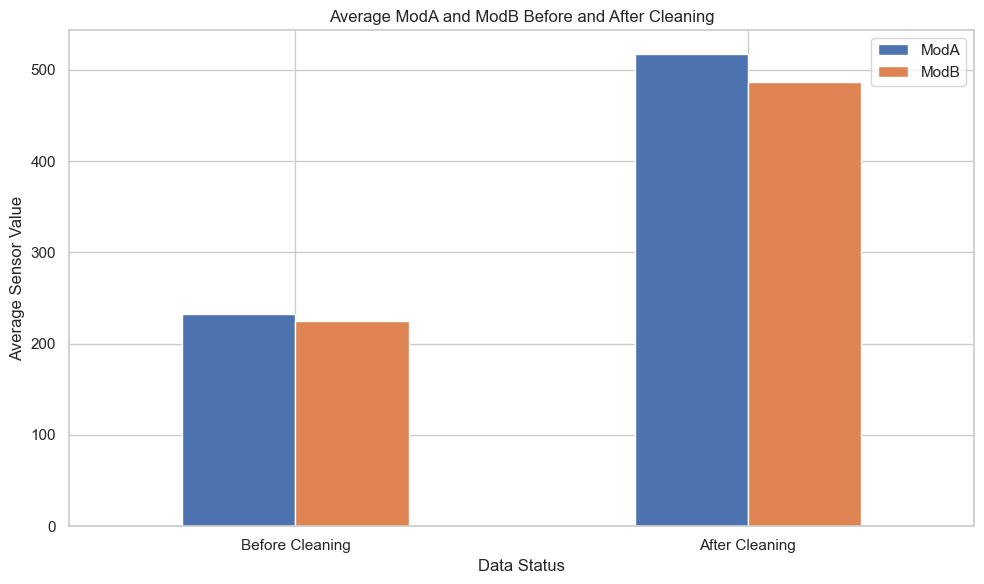

In [44]:
# clening impact of outliers
# Group by cleaning flag and plot average ModA and ModB pre and post-cleaning
#  Group by outlier flag
data_grouped = df.groupby('outlier_flag')[['ModA', 'ModB']].mean()
data_grouped.index = ['Before Cleaning', 'After Cleaning']
# Plot
data_grouped.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Average ModA and ModB Before and After Cleaning')
plt.ylabel('Average Sensor Value')
plt.xlabel('Data Status')
plt.tight_layout()
plt.show() 

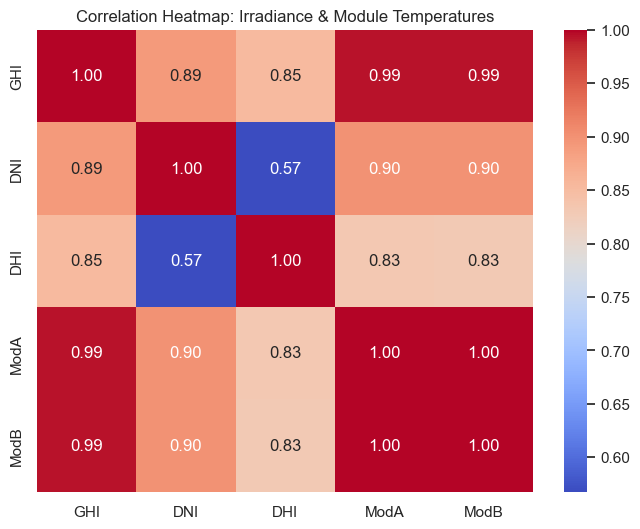

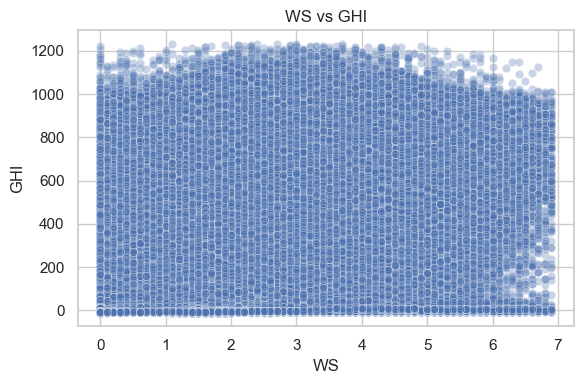

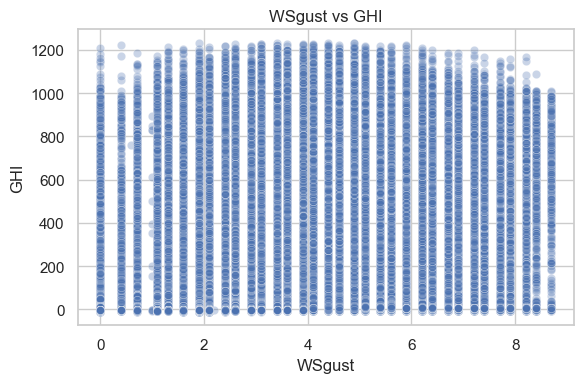

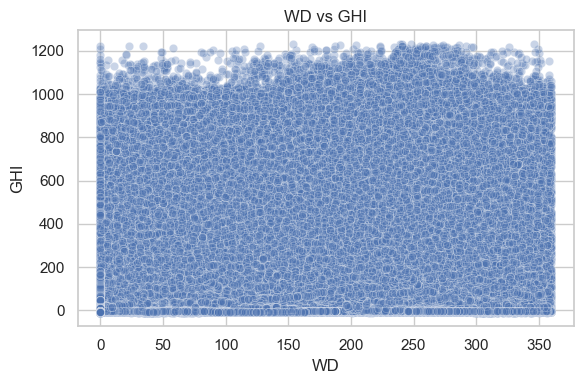

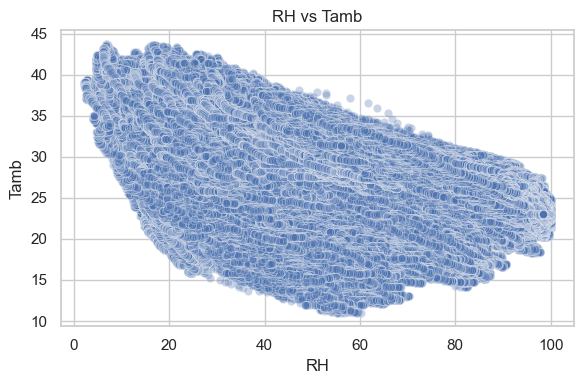

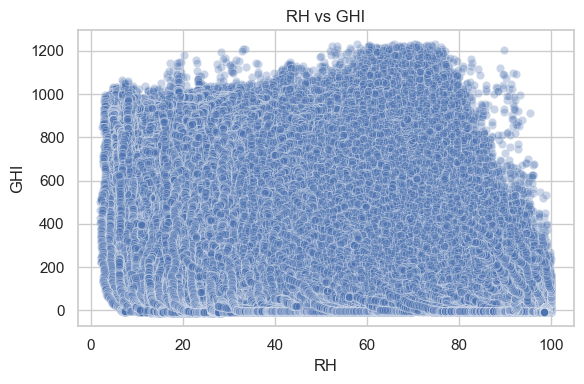

In [45]:
# Correlation & Relationship Analysis
# Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).
# Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

def correlation_and_relationship_analysis(df):
    """
    Generate correlation heatmap and scatter plots for relationship analysis.
    """
    # Set plot style
    sns.set(style='whitegrid', context='notebook')

    # Correlation Heatmap
    corr_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
    corr_matrix = df[corr_cols].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap: Irradiance & Module Temperatures')
    plt.show()

    # Scatter plots
    scatter_pairs = [
        ('WS', 'GHI'),
        ('WSgust', 'GHI'),
        ('WD', 'GHI'),
        ('RH', 'Tamb'),
        ('RH', 'GHI')
    ]

    for x, y in scatter_pairs:
        if x in df.columns and y in df.columns:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[x], y=df[y], alpha=0.3)
            plt.title(f'{x} vs {y}')
            plt.xlabel(x)
            plt.ylabel(y)
            plt.tight_layout()
            plt.show()

correlation_and_relationship_analysis(cleaned_df)

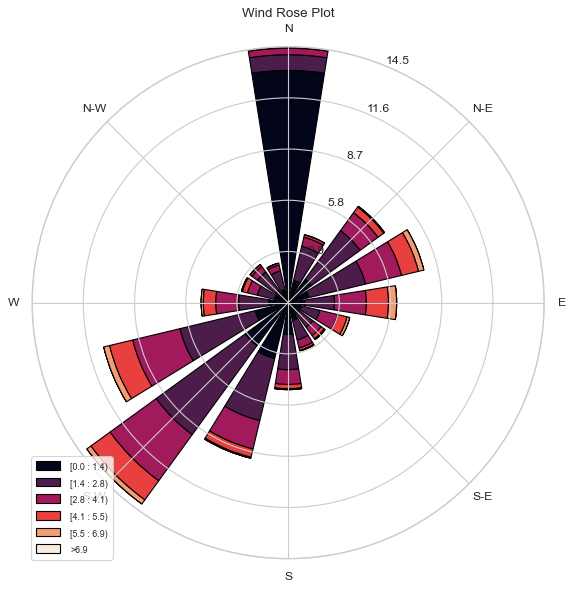

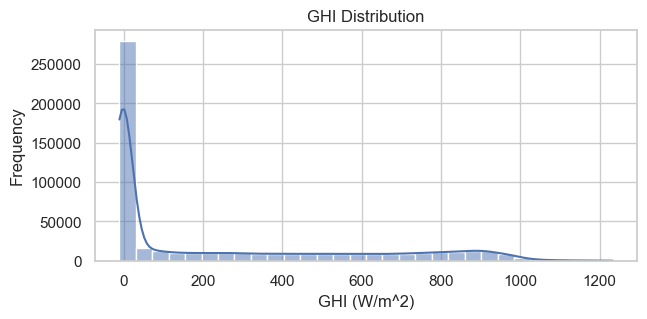

In [46]:
# Wind & Distribution Analysis
# Wind rose or radial bar plot of WS/WD.
# Histograms for GHI and one other variable (e.g. WS).

def wind_and_distribution_analysis(df):
    """
    Analyze wind speed and direction distribution.
    """
    # Wind Rose Plot of WS/WD
    ax = WindroseAxes.from_ax()
    ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='black')
    ax.set_legend()
    plt.title('Wind Rose Plot')
    plt.show()

    # Histograms for GHI and one other variable (e.g. WS).
    plt.figure(figsize=(7, 3))
    sns.histplot(df['GHI'], bins=30, kde=True)
    plt.title('GHI Distribution')
    plt.xlabel('GHI (W/m^2)')
    plt.ylabel('Frequency')
    plt.show()

# Example usage
wind_and_distribution_analysis(cleaned_df)

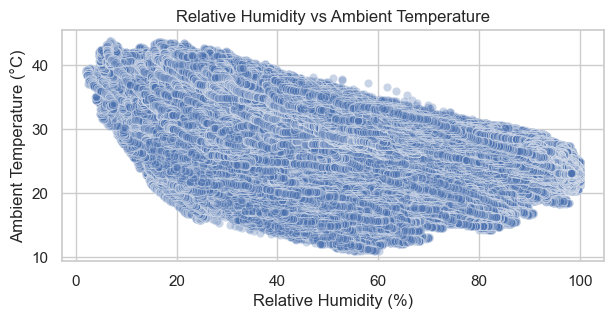

Correlation between RH and Tamb: -0.41


In [47]:
# Temperature Analysis
# Examine how relative humidity (RH) might influence temperature readings and solar radiation.

def temperature_analysis(df):
    """
    Analyze the relationship between relative humidity (RH) and temperature readings.
    """
    # Scatter plot of RH vs Tamb
    plt.figure(figsize=(7, 3))
    sns.scatterplot(x=df['RH'], y=df['Tamb'], alpha=0.3)
    plt.title('Relative Humidity vs Ambient Temperature')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Ambient Temperature (°C)')
    plt.show()

    # Correlation between RH and Tamb
    corr = df[['RH', 'Tamb']].corr().iloc[0, 1]
    print(f'Correlation between RH and Tamb: {corr:.2f}')

temperature_analysis(cleaned_df)

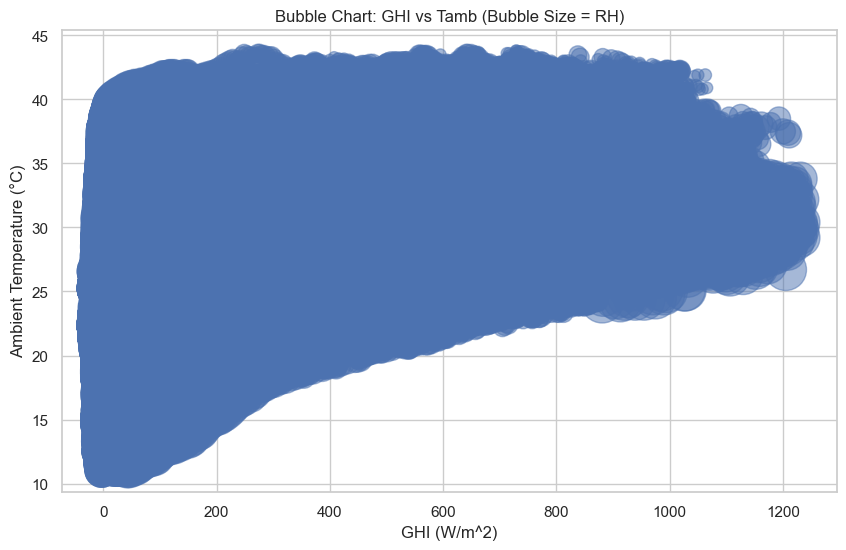

In [48]:
# Bubble Chart
# GHI vs. Tamb with bubble size = RH or BP.

def bubble_chart(df):
    """
    Create a bubble chart of GHI vs. Tamb with bubble size based on RH.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
    plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
    plt.xlabel('GHI (W/m^2)')
    plt.ylabel('Ambient Temperature (°C)')
    plt.grid(True)
    plt.show()

bubble_chart(cleaned_df)